# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Import Modules


In [1]:
print('[0/1]: Importing all relevant modules...')

import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.mlab as mlab
import collections
import cv2
import sklearn
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import os
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff


%matplotlib inline


print('[1/1]: Finished importing all relevant modules...')

[0/1]: Importing all relevant modules...
[1/1]: Finished importing all relevant modules...



## Step 0: Load The Data

In [2]:
## Load train and test data and extract the files' corresponding
## features and labels fro X_train, y_train and X_test, y_test,
## respectively.

print('[0/2]: Opening and Loading data from train.p and test.p...')

with open('train.p', mode='rb') as f:
    train = pickle.load(f)
with open('test.p', mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Finished opening and loading data...')
print('[1/2]: X_train and y_train now contain features and labels.')
print('[2/2]: X_test  and y_test  now contain features and labels.')

[0/2]: Opening and Loading data from train.p and test.p...
Finished opening and loading data...
[1/2]: X_train and y_train now contain features and labels.
[2/2]: X_test  and y_test  now contain features and labels.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
## Data Table 1: Below is a summary of the data set. The table was made using 
## the plotly library.

print('Creating Data Table 1 with a summary of the data set...')

num_train, num_test = len(train['features']),len(test['features'])
image_shape = test['features'][0].shape
unique_classes = np.unique(test['labels'])
num_unique_classes = len(unique_classes)

training_summary_data_matrix = [['Training Summary', 'Number'],
               ['Training Examples',str(num_train)],
               ['Testing Examples',str(num_test)],
               ['Image Shape', 'W:{}, H:{}, D:{}'.format(image_shape[0],image_shape[1], image_shape[2])],
               ['Unique Classes',str(num_unique_classes)]
              ]


plotly.tools.set_credentials_file(username='umarqattan', api_key='6rTIYzAN8lwsKeFdswXZ')
training_summary_data_table = ff.create_table(training_summary_data_matrix)
py.iplot(training_summary_data_table,filename='training_summary_data_table')



Creating Data Table 1 with a summary of the data set...


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:

## Data Table 2: Below is a frequency distribution of the traffic sign labels. The table
## created using the plotly library.

print('Creating Data Table 2 with a frequency distribution of the data set...')

frequency_array = np.array(train['labels'])

frequency_dict = {}
for frequency in frequency_array:
    if frequency_dict.get(frequency, 0) is 0:
        frequency_dict[frequency] = 1
    else:
        frequency_dict[frequency] += 1

traffic_sign_data_matrix = [['Traffic Sign Label', 'Frequency']]
for (key, value) in sorted(frequency_dict.items()):
    traffic_sign_data_matrix.append([key, value])
    

traffic_sign_data_table = ff.create_table(traffic_sign_data_matrix)
py.iplot(traffic_sign_data_table,filename='traffic_sign_data_table')

Creating Data Table 2 with a frequency distribution of the data set...


Displaying 15 randomly selected images from the X_train data set...


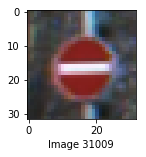

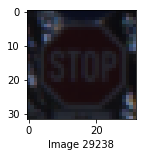

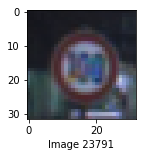

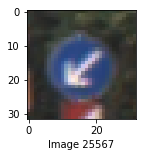

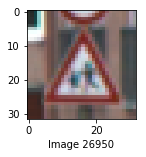

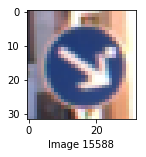

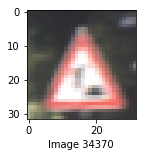

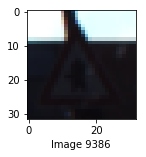

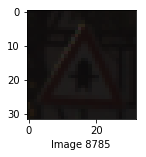

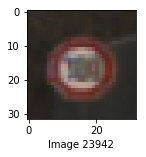

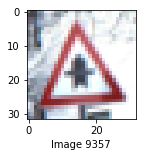

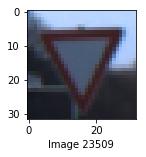

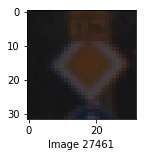

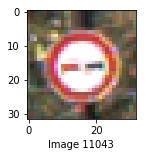

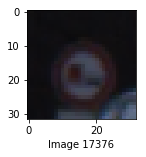

In [5]:
## Data Images 1: Below are 15 randomly selected images from the X_train data set.

print('Displaying 15 randomly selected images from the X_train data set...')

random_traffic_sign_images = random.sample(range(len(X_train)), 15)

for traffic_sign_image in random_traffic_sign_images:
    plt.figure(figsize=(2,2))
    plt.xlabel("Image " + str(int(traffic_sign_image)))
    plt.imshow(X_train[int(traffic_sign_image)])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Preprocessing Data Set Helper Functions

In [6]:
## Helper functions to normalize and grayscale a given image

def normalize(image):
    x_min, x_max = np.amin(image), np.amax(image)
    a, b = 0.1, 0.9
    return a + (image-x_min)*(b-a)/(x_max-x_min)

def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)



## Preprocessing Data Set

In [7]:
## Normalize the training data set
print('Normalizing the training data...')

X_train = normalize(X_train)

print('Finished normalizing the training data...')




Normalizing the training data...
Finished normalizing the training data...


### Question 1

Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques?

### Answer 1

To preprocess the training data, all that was done was to normalize the images. The reason for using this technique is to ensure that each image has the same dimensions and pixel value ranges.

Normalizing the images consists of projecting each pixel value to a range between 0.1 and 0.9. Adding a 0.1 offset to the output value of the normalized data ensures that the pixel value is at least 0.1 and that division by 0 or a number close to 0 does not occur.

## Augmenting Data Set

In [8]:
## Augment Data Set by generating additional data, splitting it 
## testing and validation sets.

augmented_train_test_split = train_test_split(X_train,
                                             y_train,
                                             test_size=0.35,
                                             random_state=34799)


train_features = augmented_train_test_split[0]
X_valid        = augmented_train_test_split[1]
train_labels   = augmented_train_test_split[2]
y_valid        = augmented_train_test_split[3]

## Data Table 3: Below is a data table displaying the number of validation
## features and the number of training features. The table
## created using the plotly library. 

features_data_matrix = [
                    
                    [ 'Axis', 'Validation', 'Training'],
                    [ 'X', len(X_valid), len(X_train)],
                    [ 'y', len(y_valid), len(y_train)]
                ]
features_data_table = ff.create_table(features_data_matrix)
py.iplot(features_data_table,filename='features_data_table')






### Question 1 (Optional)

OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.

### Answer 1 (Optional)

I setup the augmented data set to include 30% of the original data set. The reason I chose 30% of the original data set was that not only for statistical significance, but also to normalize the data so that the classifier can have a higher accuracy.

### Model Architecture

In [9]:
## Below is the Architecture for the Convolutional Neural Network

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional Layer with an Input shape of 32x32x1 and an Output shape of 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation Function
    conv1 = tf.nn.relu(conv1)

    #Max Pool Regularization 1: with an Input shape of 28x28x6 and whose Output shape is 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional Layer with an Output shape of 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation Function 1:
    conv2 = tf.nn.relu(conv2)

    #Max Pool Regularization 2: with an Input shape of 10x10x16 and an Output shape of 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten Layer 1: with an Input shape of 5x5x16 and an Output shape of 400.
    fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected Layer with an Input shape of 400 and an Output shape of 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation Function 2
    fc1    = tf.nn.relu(fc1)

    #Layer 4: Fully Connected Layer with an Input shape of 120 and an Output shape of 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation Function 3:
    fc2    = tf.nn.relu(fc2)

    #Layer 5: Fully Connected Layer with an Input shape of 84 and an Output shape of 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, num_unique_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(num_unique_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 2

Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.)

### Answer 2

The final deep neural network architecture I used was quite similar to that of the LeNet deep neural network used in Lessons 6 and 7 for Project 2 of the Udacity Self Driving Car Nanodegree program.

In Data Table 4 below is a tabulated summary of the LeNet Deep Neural Network used to help classify traffic signs.

In [10]:
## Data Table 4: Below is a summary of the Deep Neural Network Architecture.
## The table was created using the plotly library.

deep_nn_model_summary_data_matrix = [
                    
                    [ 'Layer', 'Input Shape', 'Output Shape'],
                    ['Convolutional 1', '32x32x1', '28x28x6'],
                    ['ReLU 1','28x28x6', '28x28x6' ],
                    ['Max Pooling 1', '28x28x6', '14x14x6'],
                    ['Convolutional 2', '14x14x6', '10x10x16'],
                    ['ReLU 2', '10x10x16', '10x10x16'],
                    ['Max Pooling 2', '10x10x16', '5x5x16'],
                    ['Flatten 1', '5x5x16', '400'],
                    ['Fully Connected 1', '400', '120'],
                    ['ReLU 3', '120', '120'],
                    ['Fully Connected 2', '120', '84'],
                    ['ReLU 4', '84', '84'],
                    ['Fully Connected 3', '84', '43']
                ]
deep_nn_model_summary_data_table = ff.create_table(deep_nn_model_summary_data_matrix)
py.iplot(deep_nn_model_summary_data_table,filename='deep_nn_model_summary_data_table')


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Questions 3 and 4

Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

### Answers 3 and 4

In order to optimize the LeNet Deep Neural Network used above (LeNet(x)), I used the AdamOptimizer(learning_rate) with a learning rate of 0.001, and a batch size of 128.

I tuned the learning rate and batch size hyperparameters as described below.

I experimented with the following learning rates [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1] inclusive and found that a learning rate of 0.001 and 0.005 yielded the highest validation accuracy, independent of the batch and epoch sizes.

As far as the batch size went, I experimented with [32, 64, 128, 256, 512, 1028, 2048] inclusive. I found that batch sizes of 128 and 256 yielded the highest validation accuracy, independent of the learning rate and epoch size.

Lastly, as far as the epoch length went, I experimented with [10, 15, 20] inclusive. I found that epoch lengths of 10 and 15 yielded the highest validation accuracy, independent of the learning rate and batch size.

Below is a bit of code that trains the LeNet modified traffic sign classifier model with the abovementioned optimally tuned hyperparameters implemented.



In [11]:
## Hyperparameters

epochs = 10
batch_size = 128

In [12]:


# Training Data Imgaes and Label Placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, num_unique_classes)

# Training Model Pipeline

learning_rate      = 0.005
logits             = LeNet(x)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Prediction and Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create Saver for training model
saver = tf.train.Saver()

# Evaluate Accuracy
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    session = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = session.run(accuracy_operation, feed_dict={x: batch_x, y:batch_y})
        total_accuracy += accuracy*len(batch_x)
    return total_accuracy/num_examples


# Train Model

validation_accuracies = []
training_accuracies = []
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Begin Training Model...\n')
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            session.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracies.append('{:.3f}'.format(validation_accuracy))
        training_accuracies.append('{:.3f}'.format(training_accuracy))
    saver.save(session, './train_model.ckpt')
    
    print('Finished Training Model...')
    print('Saving trained model to train_model.ckpt...')

Begin Training Model...

Finished Training Model...
Saving trained model to train_model.ckpt...


In [13]:
## Data Table 5: Below is a summary of the validation accuracies and
## training accuracies for the above implemented training model.


deep_nn_model_accuracy_summary_data_matrix = [
                    [ 'Epoch #', 'Validation Accuracy', 'Training Accuracy'],   
                ]

for epoch in range(epochs):
    deep_nn_model_accuracy_summary_data_matrix.append([epoch+1,validation_accuracies[epoch],training_accuracies[epoch]])

deep_nn_model_accuracy_summary_data_table = ff.create_table(deep_nn_model_accuracy_summary_data_matrix)
py.iplot(deep_nn_model_accuracy_summary_data_table,filename='deep_nn_model_accuracy_summary_data_table')


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [14]:
predictions = tf.nn.softmax(logits)

new_images = sorted(os.listdir('new_images'))
del new_images[0]
print(new_images)
new_images_list = []
actual_new_images_list = [4, 38, 14, 28, 26, 30, 30, 1]
actual_new_images_list_class_names = ['Speed Limit (70km/h)',
                                   'Keep Right',
                                   'Stop',
                                   'No Passing',
                                   'Traffic Signals',
                                   'Right of Way at Next Intersection',
                                   'Beware of Ice/Snow',
                                   'Yield']
predicted_new_images_list_class_names = ['Speed Limit (70km/h)',
                                   'Keep Right',
                                   'Stop',
                                   'Children Crossing',
                                   'Traffic Signals',
                                   'Beware of Ice/Snow',
                                   'Beware of Ice/Snow',
                                   'Speed Limit (30km/h)']
for new_image in new_images:
    
    print('new_images/' + new_image)
    image_bitmap = mpimg.imread('new_images/' + new_image)
    color_image = cv2.cvtColor(image_bitmap, cv2.COLOR_RGB2HSV)
    color_image = cv2.cvtColor(color_image, cv2.COLOR_HSV2RGB)
    new_images_list.append(color_image)
    
new_images_list = normalize(np.array(new_images_list))

with tf.Session() as session:
    saver.restore(session, './train_model.ckpt')
    
    prediction_validations = session.run(predictions, feed_dict={x:new_images_list})
    predictions = np.argmax(prediction_validations, 1)
    saver.save(session, './train_model.ckpt')
    
    print('Predicted Values', list(predictions))
    print('Actual    Values', actual_new_images_list )

['image_1.ppm', 'image_2.ppm', 'image_3.ppm', 'image_4.ppm', 'image_5.ppm', 'image_6.ppm', 'image_7.ppm', 'image_8.ppm']
new_images/image_1.ppm
new_images/image_2.ppm
new_images/image_3.ppm
new_images/image_4.ppm
new_images/image_5.ppm
new_images/image_6.ppm
new_images/image_7.ppm
new_images/image_8.ppm
Predicted Values [4, 38, 12, 31, 26, 11, 30, 1]
Actual    Values [4, 38, 14, 28, 26, 30, 30, 1]


In [15]:
## Calculate the accuracy of the predictions by iterating all predictions
## and actual images, check if they're equal (which means they're accurate),
## then increment the accuracy by 1/len(new_images).

accuracy = 0.0
for i in range(len(new_images)):
    if predictions[i] == actual_new_images_list[i]:
        accuracy += float(1/len(new_images))
print('The test accuracy of the prediction model is {}%!!! This is surprisingly good considering this is a rudimentary model of a deep neural network! '.format(accuracy*100.0))



The test accuracy of the prediction model is 62.5%!!! This is surprisingly good considering this is a rudimentary model of a deep neural network! 


In [16]:
## Data Table 6: Below is a summary of the model prediction classification
## vs actual image classification. The table was created using the plotly library.


deep_nn_model_prediction_summary_data_matrix = [
                    [ 'Actual Image Name','Predicted Image Name', 'Accurate?'],   
                ]

for i in range(len(new_images)): 
    if predictions[i] == actual_new_images_list[i]:
        deep_nn_model_prediction_summary_data_matrix.append([actual_new_images_list_class_names[i],predicted_new_images_list_class_names[i],'YES'])
    else:
        deep_nn_model_prediction_summary_data_matrix.append([actual_new_images_list_class_names[i],predicted_new_images_list_class_names[i],'NO'])

deep_nn_model_prediction_summary_data_matrix.append(['Accuracy', '','{}%'.format(accuracy*100.0)])
deep_nn_model_prediction_summary_data_table = ff.create_table(deep_nn_model_prediction_summary_data_matrix)
py.iplot(deep_nn_model_prediction_summary_data_table,filename='deep_nn_model_prediction_summary_data_table')


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [17]:
with tf.Session() as session:
    saver.restore(session, tf.train.latest_checkpoint('.'))
    top_k = session.run(tf.nn.top_k(prediction_validations, 5, sorted=True))
    saver.save(session, './model_train.ckpt')
    

soft_max_indices = top_k.indices
soft_max_probabilities = top_k.values

soft_max_image_indices = []
soft_max_image_probs = []
soft_max_image_structs = []

probs = top_k[0]
indices = top_k[1]

for i in range(len(new_images)):
    soft_max_image_indices.append(list(indices[i]))
    soft_max_image_probs.append(list(probs[i]))




In [18]:
soft_max_probabilities_matrix_1 = [
                    [ 'Image #1',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[0])):
    soft_max_probabilities_matrix_1.append([str(soft_max_image_indices[0][i]), str(soft_max_image_probs[0][i])])
    
soft_max_probabilities_data_table_1 = ff.create_table(soft_max_probabilities_matrix_1)
py.iplot(soft_max_probabilities_data_table_1,filename='soft_max_probabilities_matrix_data_table_1')


In [19]:
soft_max_probabilities_matrix_2 = [
                    [ 'Image #2',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[1])):
    soft_max_probabilities_matrix_2.append([str(soft_max_image_indices[1][i]), str(soft_max_image_probs[1][i])])
    
soft_max_probabilities_data_table_2 = ff.create_table(soft_max_probabilities_matrix_2)
py.iplot(soft_max_probabilities_data_table_2,filename='soft_max_probabilities_matrix_data_table_2')


In [20]:
soft_max_probabilities_matrix_3 = [
                    [ 'Image #3',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[2])):
    soft_max_probabilities_matrix_3.append([str(soft_max_image_indices[2][i]), str(soft_max_image_probs[2][i])])
    
soft_max_probabilities_data_table_3 = ff.create_table(soft_max_probabilities_matrix_3)
py.iplot(soft_max_probabilities_data_table_3,filename='soft_max_probabilities_matrix_data_table_3')


In [21]:
soft_max_probabilities_matrix_4 = [
                    [ 'Image #4',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[3])):
    soft_max_probabilities_matrix_4.append([str(soft_max_image_indices[3][i]), str(soft_max_image_probs[3][i])])
    
soft_max_probabilities_data_table_4 = ff.create_table(soft_max_probabilities_matrix_4)
py.iplot(soft_max_probabilities_data_table_4,filename='soft_max_probabilities_matrix_data_table_4')


In [22]:
soft_max_probabilities_matrix_5 = [
                    [ 'Image #5',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[4])):
    soft_max_probabilities_matrix_5.append([str(soft_max_image_indices[4][i]), str(soft_max_image_probs[4][i])])
    
soft_max_probabilities_data_table_5 = ff.create_table(soft_max_probabilities_matrix_5)
py.iplot(soft_max_probabilities_data_table_5,filename='soft_max_probabilities_matrix_data_table_5')


In [23]:
soft_max_probabilities_matrix_6 = [
                    [ 'Image #6',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[5])):
    soft_max_probabilities_matrix_6.append([str(soft_max_image_indices[5][i]), str(soft_max_image_probs[5][i])])
    
soft_max_probabilities_data_table_6 = ff.create_table(soft_max_probabilities_matrix_6)
py.iplot(soft_max_probabilities_data_table_6,filename='soft_max_probabilities_matrix_data_table_6')


In [24]:
soft_max_probabilities_matrix_7 = [
                    [ 'Image #7',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[6])):
    soft_max_probabilities_matrix_7.append([str(soft_max_image_indices[6][i]), str(soft_max_image_probs[6][i])])
    
soft_max_probabilities_data_table_7 = ff.create_table(soft_max_probabilities_matrix_7)
py.iplot(soft_max_probabilities_data_table_7,filename='soft_max_probabilities_matrix_data_table_7')


In [25]:
soft_max_probabilities_matrix_8 = [
                    [ 'Image #8',''],
                    [ 'Class ID','Probability']
                ]
for i in range(len(soft_max_image_indices[6])):
    soft_max_probabilities_matrix_8.append([str(soft_max_image_indices[7][i]), str(soft_max_image_probs[7][i])])
    
soft_max_probabilities_data_table_8 = ff.create_table(soft_max_probabilities_matrix_8)
py.iplot(soft_max_probabilities_data_table_8,filename='soft_max_probabilities_matrix_data_table_8')


### Conclusion and References

To successfully complete the Self Driving Car Nanodegree Project 2, Traffic Sign Classifier, I used the LeNet Convolutional Neural Network architecture provided in the lessons, the German Traffic Sign Dataset, LeNet hyperparameter suggestions to tune my convnet, and plotly for my data organization and visualization. 

I was able to obtain a fairly high testing validation on my images (both for randomly selected images from the given image data set and 8 German Traffic Sign images from the German Traffic Sign Dataset). The accuracy for the randomly selected images resulted in >93% (98.8 after 10 epochs at a learning rate of 0.005 and a batch size of 128). Lastly, the accuracy for the 8 extra images from the German Traffic Sign Data Set resulted in a surprising 62.5% (which is 5/8 correctly classified images!). 

Overall, I am pleased with the outcome of this project, and would probably enhance it later on with more diagrams and detailed visuals to truly represent the accuracy of the classifier. I might also add a grayscale and image modifier to make it easier for the classifier to distinguish ambiguous signs in the given images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.